1. Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результат вы получили? Что помогло улучшить точность?

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras import backend as K 
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error




In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/intro_nn/lesson5/airline-passengers.csv', skipfooter=5, engine='python')

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dataset = df.iloc[:, 1].values

In [ ]:
dataset

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622])

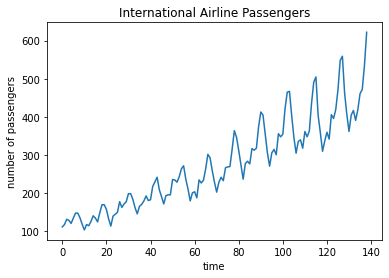

In [ ]:
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers')
plt.title('International Airline Passengers')
plt.show()

###  Preprocessing

In [ ]:


dataset = dataset.reshape(-1, 1)
dataset = dataset.astype('float32')
dataset.shape

(139, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


In [ ]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset) - train_size
train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset),:]
print(f'train_size : {len(train)}, test_size : {len(test)}')

train_size : 97, test_size : 42


In [ ]:
timestamp = 10
dataX = []
dataY = []

for i in range(len(train) - timestamp-1):
  a = train[i: (i + timestamp), 0]
  dataX.append(a)
  dataY.append(train[i+timestamp,0])

trainX = np.array(dataX)
trainY = np.array(dataY)

In [ ]:
timestamp = 10
dataX = []
dataY = []

for i in range(len(test) - timestamp-1):
  a = test[i: (i + timestamp), 0]
  dataX.append(a)
  dataY.append(test[i+timestamp,0])

testX = np.array(dataX)
testY = np.array(dataY)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### Creating LSTM (Long short-term memory)

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestamp)))

model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
86/86 [==============================] - 2s 3ms/step - loss: 0.0507
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 8/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 10/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 11/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 12/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 13/100
86/86 [=================

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.75 RMSE
Test Score: 35.47 RMSE


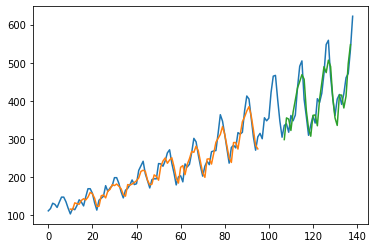

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Вывод: Модель на основе LTSM достаточно точно предсказывает  количество пассажиров в заданные периоды времени (RMSE на тесте 35.47). Немного повысилась точность при увеличении x_train с 0.5 до 0.7